In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import scipy.stats as stats
from sklearn import preprocessing
import scipy.stats as stats

# Always make it pretty.
plt.style.use('seaborn-pastel')

%matplotlib inline
sns.set_style(style="whitegrid")

In [545]:
#establish groups, below and above median for income
us_median = 59039

#import dataframe
eda_df = pd.read_csv('../ignorefiles/eda_data.csv')

In [789]:
reduced_df = eda_df[['STATE_x','CITY','FOUNDATION','SUBSECTION','REVENUE_AMT','avg_income','zipcode']]

In [829]:

# df2 = subfound[['STATE_x','FOUNDATION','SUBSECTION','REVENUE_AMT','avg_income','zipcode']]
revdf = reduced_df[reduced_df['REVENUE_AMT'] > 0]
subdf = revdf[revdf['SUBSECTION'] == 3]
foudf = subdf[subdf['FOUNDATION'] == 15]

foudf

,STATE_x,CITY,FOUNDATION,SUBSECTION,REVENUE_AMT,avg_income,zipcode
0,AK,ANCHORAGE,15,3,154543.0,75.148579,99501
1,AK,ANCHORAGE,15,3,6823299.0,75.148579,99501
6,AK,ANCHORAGE,15,3,1022511.0,75.148579,99501
11,AK,ANCHORAGE,15,3,610843.0,75.148579,99501
15,AK,ANCHORAGE,15,3,1522261.0,75.148579,99501
...,...,...,...,...,...,...,...
1017108,WY,LA BARGE,15,3,64531.0,64.088889,83123
1017112,WY,THAYNE,15,3,195460.0,84.120000,83127
1017122,WY,THAYNE,15,3,297669.0,84.120000,83127
1017125,WY,ALPINE,15,3,98023.0,94.558947,83128


## NP plots

In [914]:

print(type(foudf.CITY[1]))
print(foudf.CITY[1] in revdf.CITY.values)

<class 'str'>
True


In [787]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by state


# #dual axis bar plot (reformat values to show in millions)

count = revdf.groupby('STATE_x').count()[['REVENUE_AMT']]
revs = revdf.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined = pd.merge(count,revs, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_x', ascending=False)

combined.REVENUE_AMT_y = round(combined['REVENUE_AMT_y']/1000000,2)

def dual_axis_plot(df, y1, y2, title, y1label, y2label, xlabel,filename):
    """function to plot bar and line on dual y-axis."""
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax2 = ax1.twinx()
    
    ax1.bar(df.index, y1,label='Count')
    ax1.set_xticklabels(df.index, rotation=90)
    ax1.set_xlabel(f'{xlabel}', size=12)
    ax1.set_ylabel(f'{y1label}', size=12)
    ax1.set_title(f'{title}', size=15)
    ax1.grid()
    
    ax2.bar(df.index, y2, color='gold', alpha=.3, width=.5, align='center', label='Revenues')
    ax2.set_ylabel(f'{y2label}')
    ax2.grid()
    fig.legend(bbox_to_anchor=(.5, .85))
    plt.savefig(f'../images/{filename}.png')

    

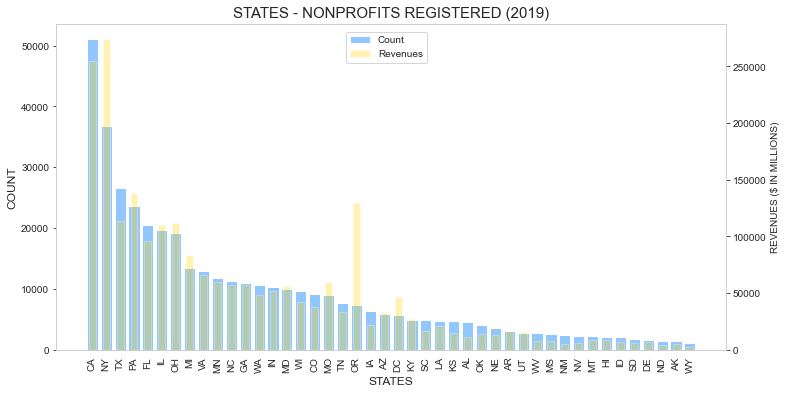

In [788]:
dual_axis_plot(combined, 
               combined['REVENUE_AMT_x'], 
               combined['REVENUE_AMT_y'],
              'STATES - NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATES',
              'num_nps2')

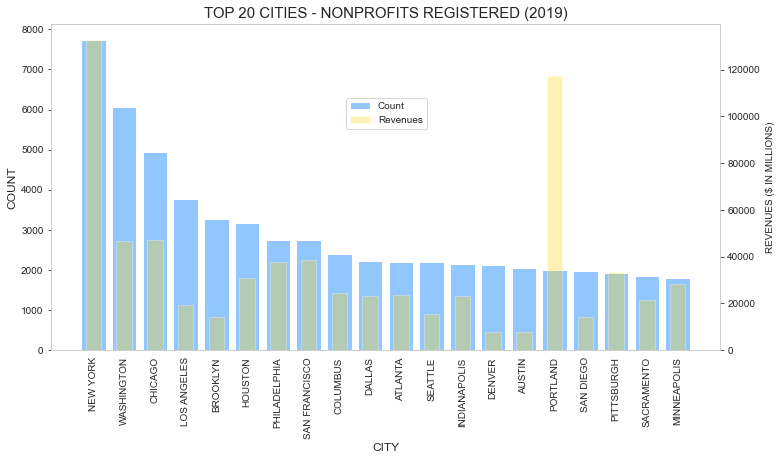

In [791]:
##### establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by city

count2 = revdf.groupby('CITY').count()[['REVENUE_AMT']]
revs2 = revdf.groupby('CITY').sum()[['REVENUE_AMT']]

combined2 = pd.merge(count2,revs2, left_index=True,right_index=True).nlargest(20, columns='REVENUE_AMT_x').sort_values(by='REVENUE_AMT_x', ascending=False)

combined2.REVENUE_AMT_y = round(combined2['REVENUE_AMT_y']/1000000,2)


dual_axis_plot(combined2, 
               combined2['REVENUE_AMT_x'], 
               combined2['REVENUE_AMT_y'],
              'TOP 20 CITIES - NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'CITY',
              'num_nps_city2')

In [223]:

new_index = [ 3,  9,  4, 12,  6,  5, 14,  8,  7, 27, 13,  2, 19, 25, 29, 10,  1,
            17, 11, 18, 23, 26, 15, 91, 16, 82,  0, 50, 20]


index_list = []

for i in new_index:
    index_list.append(f'501(c){i}')


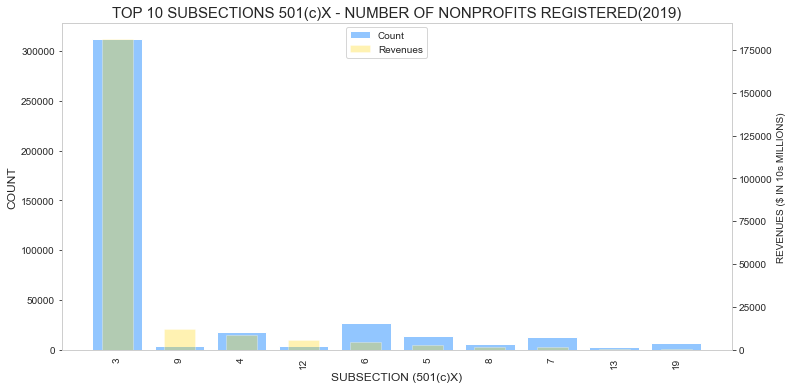

In [792]:
#nps by subsection, relevant because this will tell me 
#type of organization and if contributions are deductible
#deductible is not beind analyzed at this moment

#which subsection have the most NPs and where are they in the US


count3 = revdf.groupby('SUBSECTION').count()[['REVENUE_AMT']]
revs3 = revdf.groupby('SUBSECTION').sum()[['REVENUE_AMT']]

combined3 = pd.merge(count3,revs3, left_index=True,right_index=True).nlargest(10,columns='REVENUE_AMT_x').sort_values(by='REVENUE_AMT_y', ascending=False)

combined3.REVENUE_AMT_y = round(combined3['REVENUE_AMT_y']/10000000,2)

# combined3.index.astype('str', copy=False)
combined3.index = combined3.index.astype(str, copy=False)
dual_axis_plot(combined3, 
               combined3['REVENUE_AMT_x'], 
               combined3['REVENUE_AMT_y'],
              'TOP 10 SUBSECTIONS 501(c)X - NUMBER OF NONPROFITS REGISTERED(2019)',
              'COUNT',
              'REVENUES ($ IN 10s MILLIONS)',
              'SUBSECTION (501(c)X)',
              'num_nps_sub2')

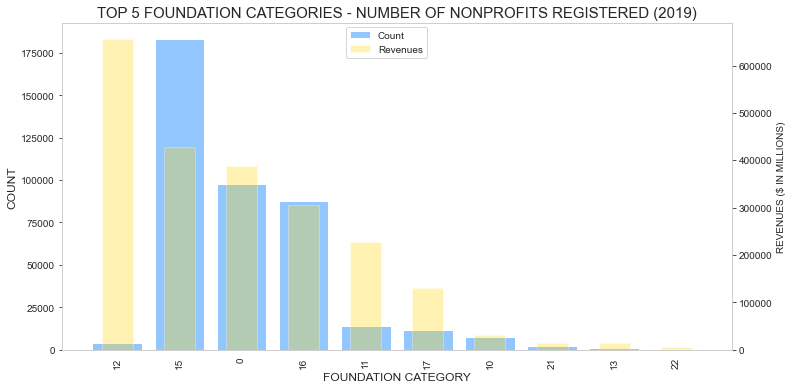

In [793]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

count4 = revdf.groupby('FOUNDATION').count()[['REVENUE_AMT']]
revs4 = revdf.groupby('FOUNDATION').sum()[['REVENUE_AMT']]

combined4 = pd.merge(count4,revs4, left_index=True,right_index=True).nlargest(10,columns='REVENUE_AMT_y').sort_values(by='REVENUE_AMT_y', ascending=False)

combined4.REVENUE_AMT_y = round(combined4['REVENUE_AMT_y']/1000000,2)


combined4.index = combined4.index.astype(str, copy=False)

dual_axis_plot(combined4, 
               combined4['REVENUE_AMT_x'], 
               combined4['REVENUE_AMT_y'],
              'TOP 5 FOUNDATION CATEGORIES - NUMBER OF NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'FOUNDATION CATEGORY',
              'num_nps_found2')

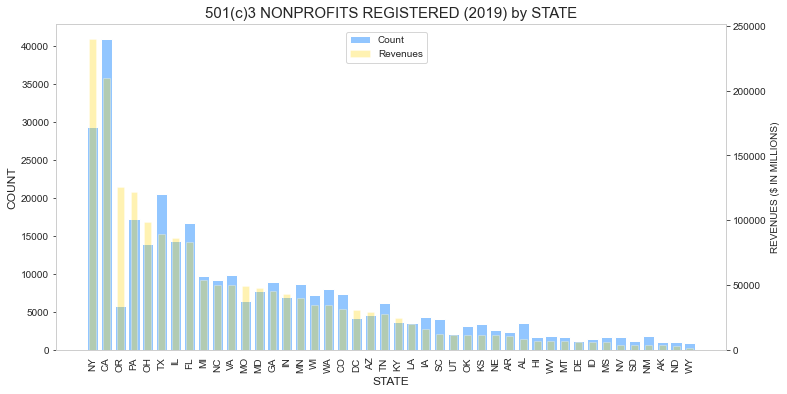

In [796]:
sub501c3 = revdf[revdf['SUBSECTION'] == 3]


count5 = sub501c3.groupby('STATE_x').count()[['REVENUE_AMT']]
revs5 = sub501c3.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined5 = pd.merge(count5,revs5, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_y', ascending=False)
#.nlargest(10,columns='REVENUE_AMT_y')
combined5.REVENUE_AMT_y = round(combined5['REVENUE_AMT_y']/1000000,2)


combined5.index = combined5.index.astype(str, copy=False)

dual_axis_plot(combined5, 
               combined5['REVENUE_AMT_x'], 
               combined5['REVENUE_AMT_y'],
              '501(c)3 NONPROFITS REGISTERED (2019) by STATE',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATE',
              'num_nps_sub2')

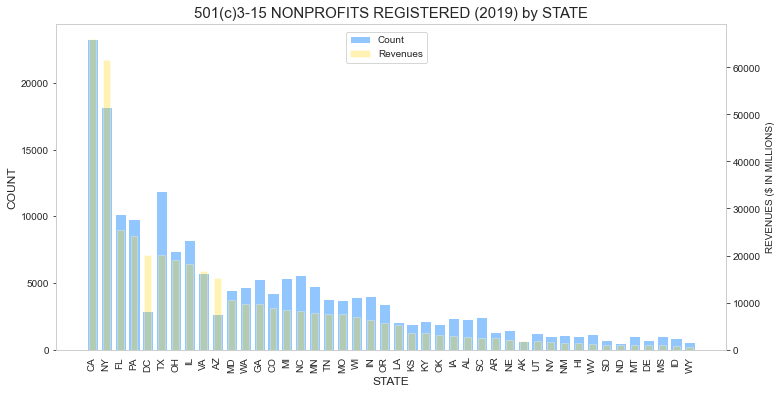

In [800]:
sub501c3 = subdf[subdf['FOUNDATION'] == 15]


count5 = sub501c3.groupby('STATE_x').count()[['REVENUE_AMT']]
revs5 = sub501c3.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined5 = pd.merge(count5,revs5, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_y', ascending=False)
#.nlargest(10,columns='REVENUE_AMT_y')
combined5.REVENUE_AMT_y = round(combined5['REVENUE_AMT_y']/1000000,2)


combined5.index = combined5.index.astype(str, copy=False)

dual_axis_plot(combined5, 
               combined5['REVENUE_AMT_x'], 
               combined5['REVENUE_AMT_y'],
              '501(c)3-15 NONPROFITS REGISTERED (2019) by STATE',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATE',
              'num_nps_subfound2')

## Income Plots

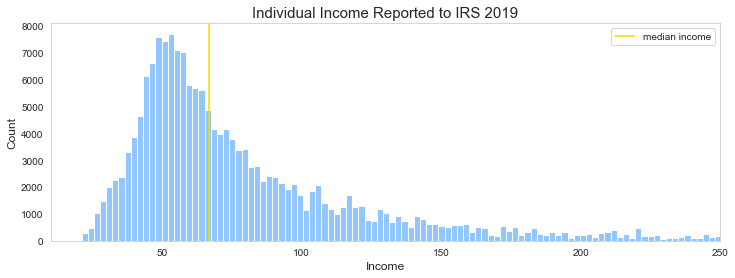

In [801]:
x = foudf['avg_income']


plt.figure(figsize=(12,4))
plt.xlim(10, 250)
plt.axvline(x.median(), color='gold', label='median income')
plt.hist(x, bins=1000)
plt.xlabel('Income', size=12)
plt.ylabel('Count', size=12)
plt.title('Individual Income Reported to IRS 2019', size=15)
plt.grid()
plt.legend()
plt.savefig('../images/hist_ind_income3.png')

#pareto distribution which is very typical for income 80% pop only has 20% of wealth/income

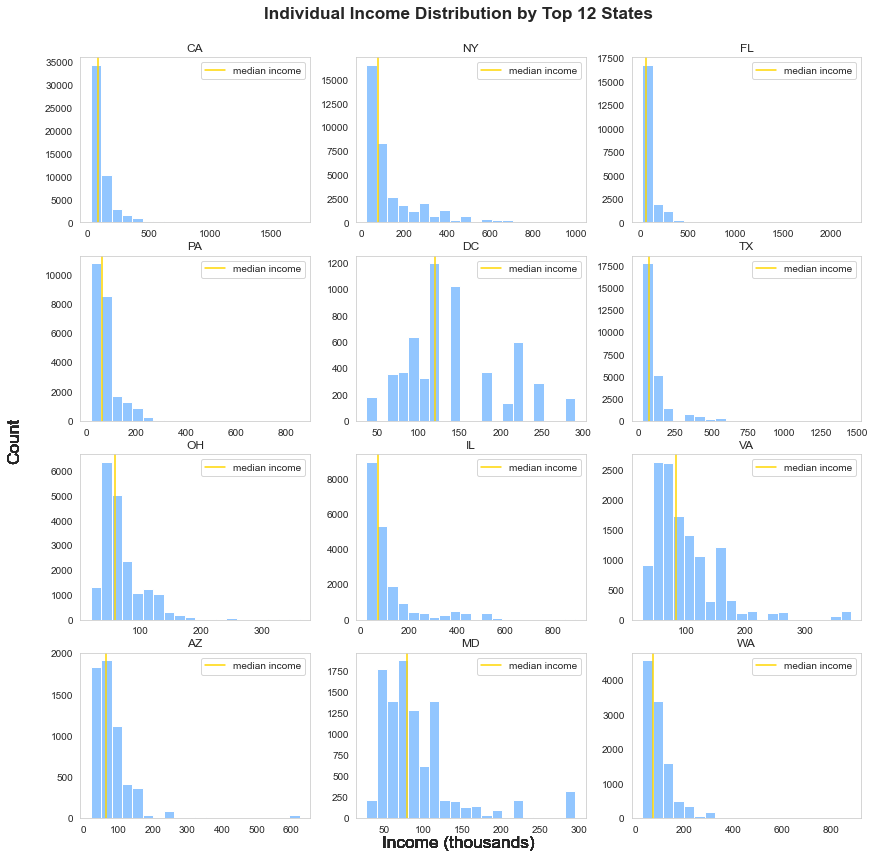

In [805]:
fig, axs = plt.subplots(4,3, figsize=(14,14))

test_state_lst = ['CA','NY','FL', 'PA', 'DC','TX','OH', 'IL','VA','AZ', 'MD','WA']

for i, axs in zip(test_state_lst, axs.flatten()):

    state = revdf[revdf['STATE_x']==f'{i}']
    
    x = state['avg_income']
    
    axs.hist(x,bins=20)
    axs.axvline(x.median(), color='gold', label='median income')
    axs.set_title(f'{i}', size=12)
    axs.grid()
    axs.legend()
    fig.tight_layout
    fig.suptitle('Individual Income Distribution by Top 12 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Income (thousands)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Count', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
    plt.savefig('../images/state_inc_hist3.png')


    

## NP vs. Income Plots

There we begin to only focus on the nonprofits who have reported income to the IRS, i.e. including only revenues greater than 0. Also, we onyl analyze the Subsection 501(c)3 which are the majority of the nonprofits and revenues. Outliers, such as subsection 12, hospitals and medical research organizations were excluded due to having the amount of revenues they generate vs number of organizations. They would heavily skew our metrics.

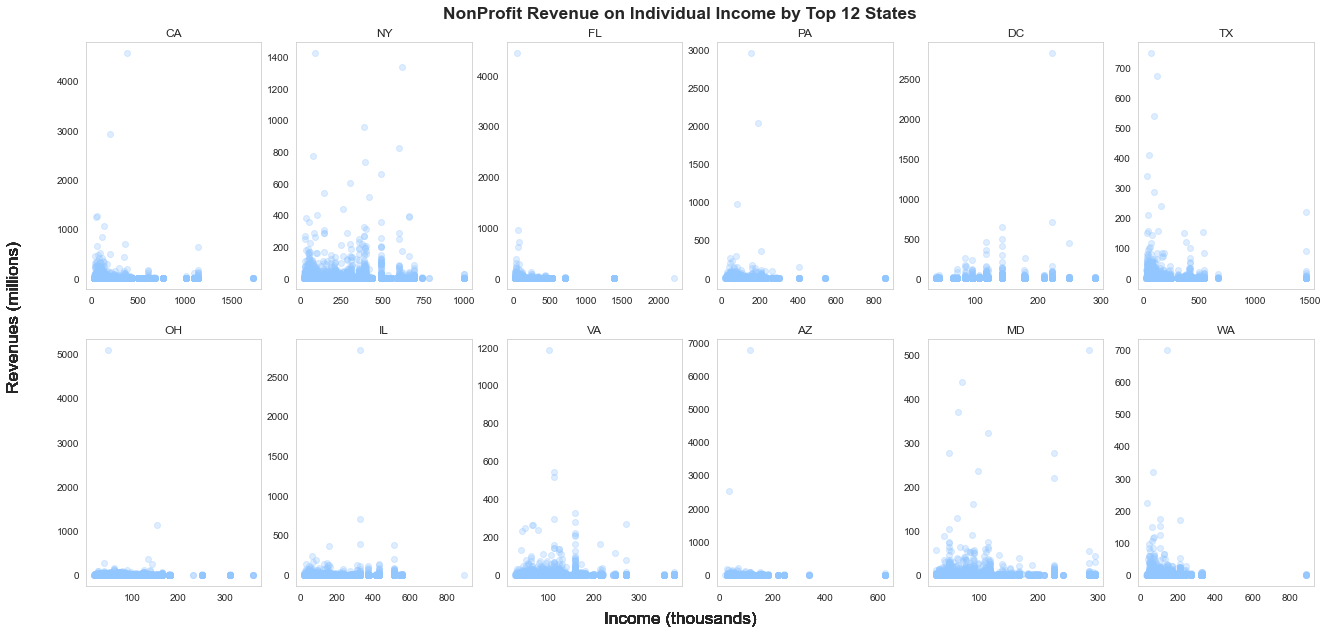

In [893]:

fig, axs = plt.subplots(2,6, figsize=(22,10))

test_state_lst = ['CA','NY','FL', 'PA', 'DC','TX','OH', 'IL','VA','AZ', 'MD','WA']

for i, axs in zip(test_state_lst, axs.flatten()):

    state = foudf[foudf['STATE_x']==f'{i}']
    
    x = state['avg_income']
    y = state['REVENUE_AMT']/1000000
    
    axs.scatter(x,y, alpha=.3)
    axs.set_title(f'{i}', size=12)
    axs.grid()
    fig.tight_layout
    fig.suptitle('NonProfit Revenue on Individual Income by Top 12 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.08, 'Income (thousands)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.08, 0.5, 'Revenues (millions)', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='expanded')
    plt.savefig('../images/rev_on_inc_scatter4.png')


### Scatter of revenue on individual income

These plots shows a very dense concentration on lower level revenue NPs. Since we are analyzing 501c3-15 only, these organizations only receive a substantial amount of support from governmental units or general public. This group is very interesting to me since, technically government funded organizations are general public funds since it's tax collected from the American citizen. The sole difference is the discretion lies on the government to donate those funds vs. the individual donating thier discretionary income to NPs. This is worth a deeper look. Also, it might be worth looking into if there is some relationship between income and lower revenue generating NPs. Large NPs understanably receive substantial government funds which can skew the story. 

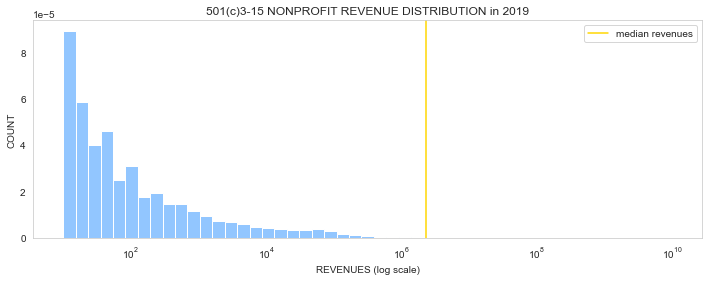

In [884]:
revs = foudf['REVENUE_AMT'].sort_values(ascending=False)


x = np.logspace(1,10)

plt.figure(figsize=(12,4))
plt.hist(revs, bins=x, density=True)
plt.axvline(revs.mean(), color='gold', label='median revenues')
plt.xscale('log')
plt.title('501(c)3-15 NONPROFIT REVENUE DISTRIBUTION in 2019')
plt.ylabel('COUNT')
plt.xlabel('REVENUES (log scale)')
plt.legend()
plt.grid()
plt.show()
# plt.savefig('../images/np_rev6.png')

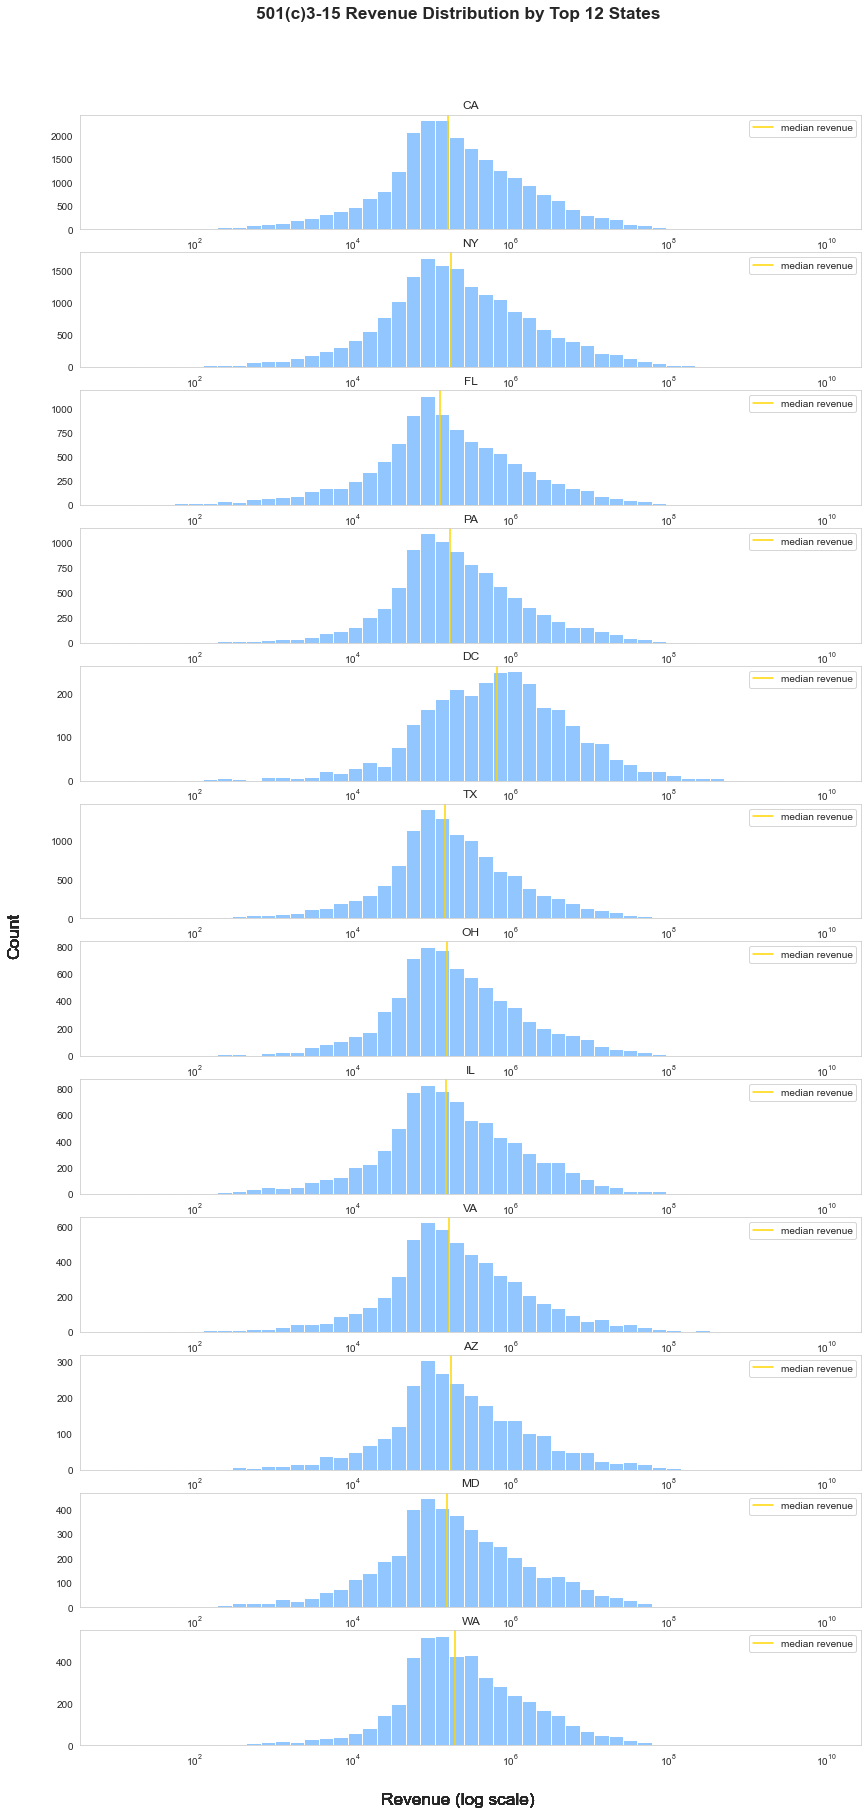

In [810]:
fig, axs = plt.subplots(12,1, figsize=(14,30))


for i, axs in zip(test_state_lst, axs.flatten()):
    
    scale = np.logspace(1,10)
    
    state = foudf[foudf['STATE_x']==f'{i}']
    
    x = state[state['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
    
    axs.hist(x,bins=scale)
    axs.axvline(x.median(), color='gold', label='median revenue')
    axs.set_title(f'{i}', size=12)
    axs.set_xscale('log')
    axs.grid()
    axs.legend()
    fig.tight_layout
    fig.suptitle('501(c)3-15 Revenue Distribution by Top 12 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Revenue (log scale)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Count', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
    plt.savefig('../images/state_rev_hist2.png')


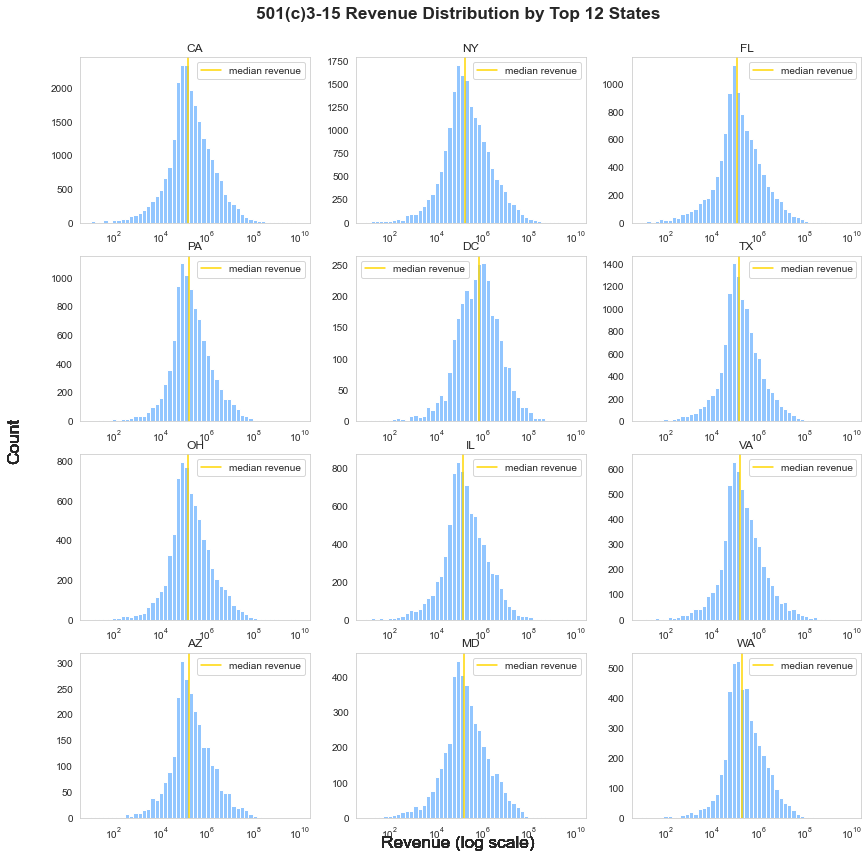

In [811]:
fig, axs = plt.subplots(4,3, figsize=(14,14))


for i, axs in zip(test_state_lst, axs.flatten()):
    
    scale = np.logspace(1,10)
    
    state = foudf[foudf['STATE_x']==f'{i}']
    
    x = state[state['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
    
    axs.hist(x,bins=scale)
    axs.axvline(x.median(), color='gold', label='median revenue')
    axs.set_title(f'{i}', size=12)
    axs.set_xscale('log')
    axs.grid()
    axs.legend()
    fig.tight_layout
    fig.suptitle('501(c)3-15 Revenue Distribution by Top 12 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Revenue (log scale)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Count', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
    plt.savefig('../images/state_rev_hist4.png')

## stats analysis

In [574]:
# eda_df.info()

In [823]:
a = revdf[revdf['avg_income'] < revdf['avg_income'].median()]['REVENUE_AMT']
b = revdf[revdf['avg_income'] >= revdf['avg_income'].median()]['REVENUE_AMT']

# ttest, pvalue = stats.ttest_ind(a,b)

ttest, pvalue = stats.ttest_ind(a,b)
pvalue
revdf['avg_income'].median

<bound method Series.median of 0          75.148579
1          75.148579
3          75.148579
5          75.148579
6          75.148579
             ...    
1017117    84.120000
1017120    84.120000
1017122    84.120000
1017125    94.558947
1017128    94.558947
Name: avg_income, Length: 409945, dtype: float64>

In [880]:
t = foudf[foudf.REVENUE_AMT > 100000000]['REVENUE_AMT'].sum()

t2 = foudf[foudf.REVENUE_AMT <= 100000000]['REVENUE_AMT'].sum()

t, t2

(152449040877.0, 275391132444.0)

array([ 154543., 6823299.,       0., ...,  225000.,       0.,       0.])

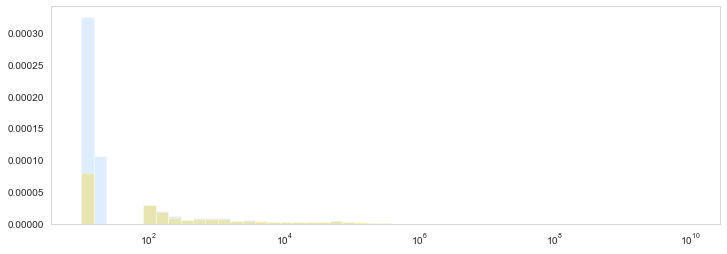

<Figure size 432x288 with 0 Axes>

In [855]:
x = np.logspace(1,10)

plt.figure(figsize=(12,4))
plt.xscale('log')
plt.hist(a, bins=x, alpha=.3,density=True)
plt.hist(b, bins=x, alpha=.3, color='gold', density=True)
plt.grid()
plt.show()
plt.savefig('../images/np_rev_dist.png');

#the probability of observing revenues above the median based on income is nearly 0. 

#the probability of observing revenues above the mean based on income is nearly 0 as well. 
#as the threshold 

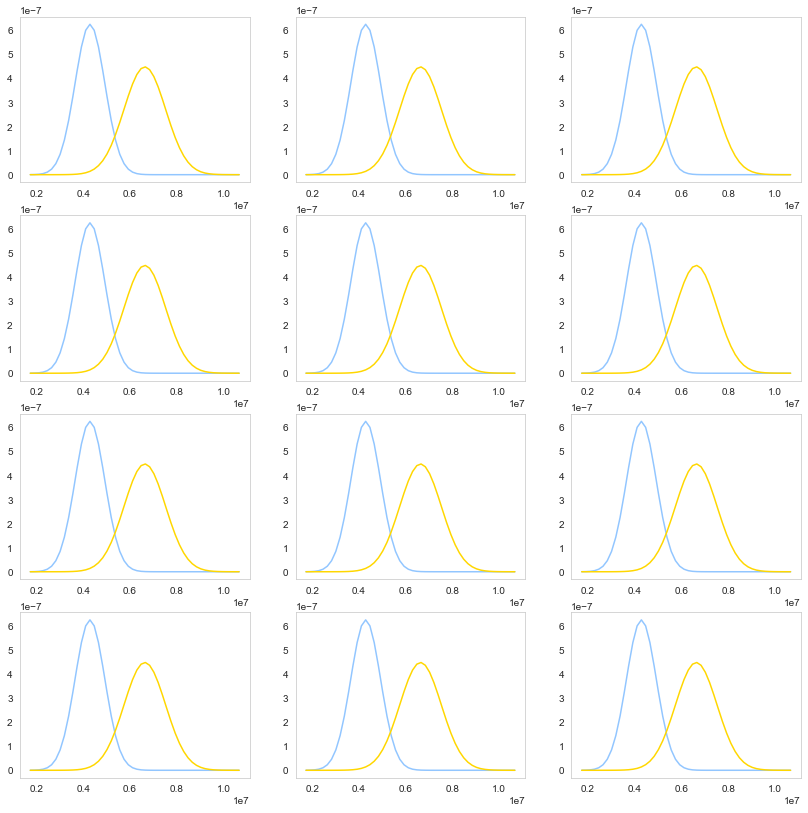

In [871]:
fig, axs = plt.subplots(4,3, figsize=(14,14))

for i, axs in zip(test_state_lst, axs.flatten()):
    
    state = foudf[foudf['STATE_x']==f'{i}']

    a = foudf[foudf['avg_income'] < foudf['avg_income'].mean()]['REVENUE_AMT']
    b = foudf[foudf['avg_income'] >= foudf['avg_income'].mean()]['REVENUE_AMT']


    min_x = a2.mean() - (a2.std()/(len(a2)**.5)*4)
    max_x = a2.mean() + (a2.std()/(len(a2)**.5)*10)

    min_y = b2.mean() - (b2.std()/(len(b2)**5)*4)
    max_y = b2.mean() + (b2.std()/(len(b2)**5)*10)


    z = np.linspace(min(min_x, min_y), max(max_x, max_y))

    one = stats.norm(loc=np.mean(a2), scale=np.std(a2)/(len(a2)**.5))
    two = stats.norm(loc=np.mean(b2), scale=np.std(b2)/(len(b2)**.5))


    axs.plot(z, one.pdf(z))
    axs.plot(z, two.pdf(z), color='gold')
    axs.grid()
    
    fig.tight_layout

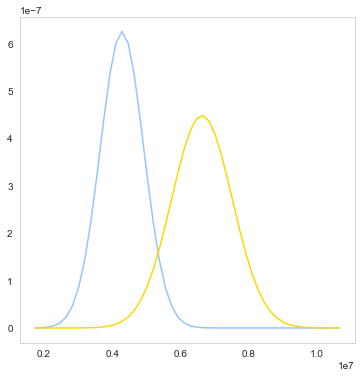

In [866]:
# Plot the distributions of the samples and compare
a = foudf[foudf['avg_income'] < foudf['avg_income'].mean()]['REVENUE_AMT']
b = foudf[foudf['avg_income'] >= foudf['avg_income'].mean()]['REVENUE_AMT']


min_x = a2.mean() - (a2.std()/(len(a2)**.5)*4)
max_x = a2.mean() + (a2.std()/(len(a2)**.5)*10)

min_y = b2.mean() - (b2.std()/(len(b2)**5)*4)
max_y = b2.mean() + (b2.std()/(len(b2)**5)*10)


z = np.linspace(min(min_x, min_y), max(max_x, max_y))

one = stats.norm(loc=np.mean(a2), scale=np.std(a2)/(len(a2)**.5))
two = stats.norm(loc=np.mean(b2), scale=np.std(b2)/(len(b2)**.5))

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(z, one.pdf(z))
ax.plot(z, two.pdf(z), color='gold')
ax.grid()


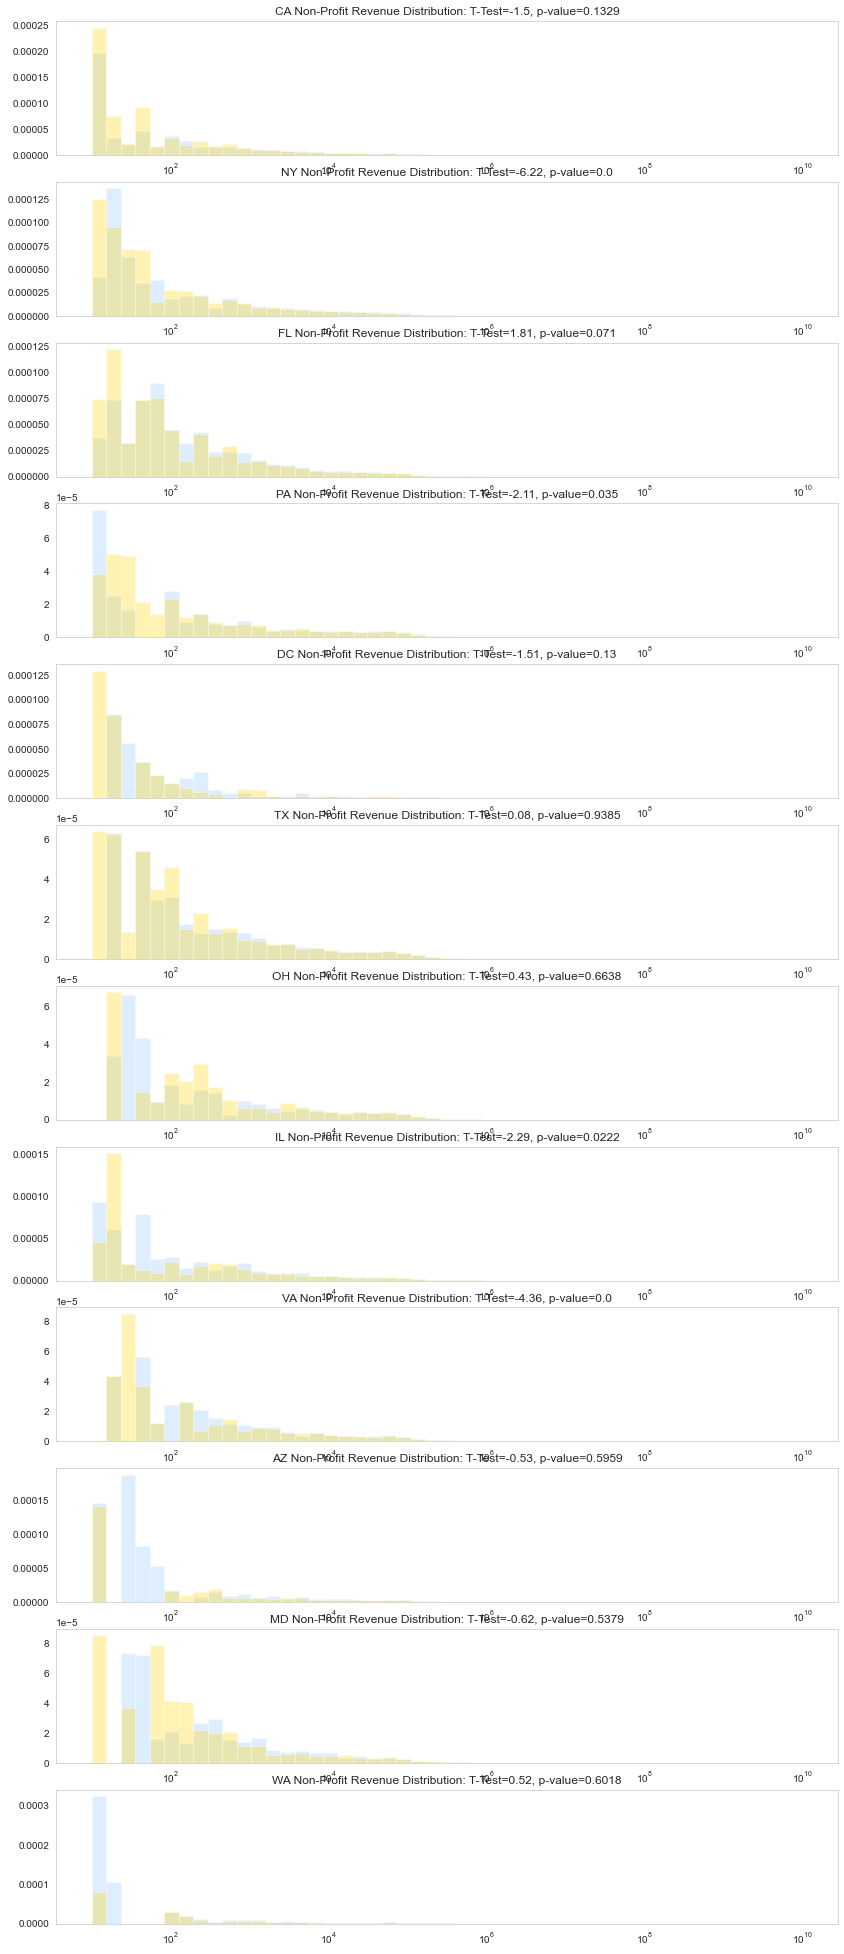

In [862]:
fig, axs = plt.subplots(12,1, figsize=(14,35))


for i, axs in zip(test_state_lst, axs.flatten()):
    
    state = foudf[foudf['STATE_x']==f'{i}']

    a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
    b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']
    
    ttest, pvalue = stats.ttest_ind(a,b)
    
    x = np.logspace(1,10)

    axs.hist(a, bins=x, alpha=.3, density=True)
    axs.hist(b, bins=x, alpha=.3, color='gold', density=True)
    axs.set_title(f'{i} Non-Profit Revenue Distribution: T-Test={round(ttest,2)}, p-value={round(pvalue,4)}')
    axs.set_xscale('log')
    axs.grid()
    
    fig.tight_layout


In [593]:
state = df[df['STATE_x']=='DC']

a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']

a2 = a[a>0]
b2 = b[b>0]

ttest, pvalue = stats.ttest_ind(a2,b2)

ttest, pvalue

(-1.673066163221302, 0.09436945626190285)

In [688]:


for i in test_state_lst:
    
    state = df[df['STATE_x']==f'{i}']

    a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
    b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']
    
    a2 = a[a>0]
    b2 = b[b>0]
    
    med = state['REVENUE_AMT'].mean()
    stda2 = a2.std()
    meda2 = a2.mean()
    ttest, pvalue = stats.ttest_ind(a2,b2)

In [686]:
subsection = df[df.SUBSECTION == 3]

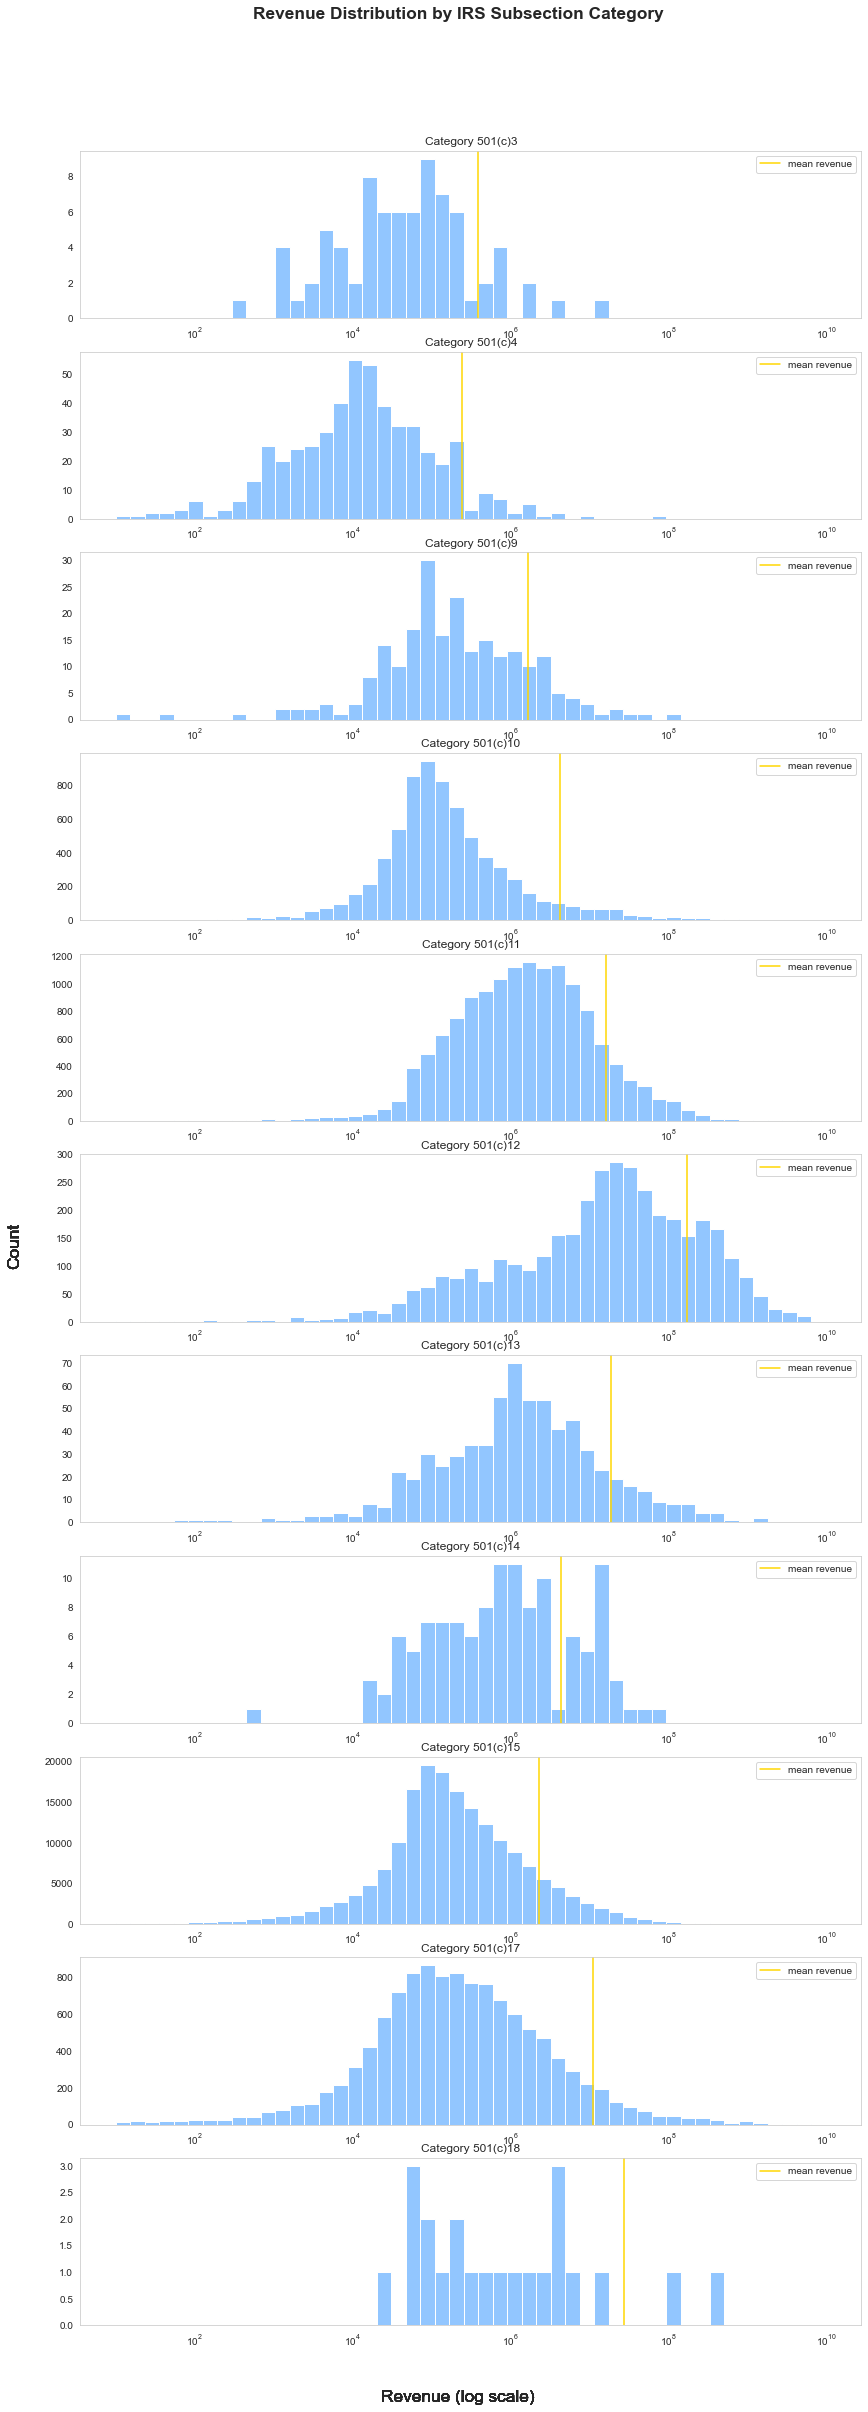

In [868]:
fig, axs = plt.subplots(11,1, figsize=(14,40))

test_sub_lst = [3,4,9,10,11,12,13,14,15,17,18]

for i, axs in zip(test_sub_lst, axs.flatten()):
    
    scale = np.logspace(1,10)
    
    foundation = subsection[subsection['FOUNDATION']==i]
    
    x = foundation[foundation['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
    
    axs.hist(x,bins=scale)
    axs.axvline(x.mean(), color='gold', label='mean revenue')
    axs.set_title(f'Category 501(c){i}', size=12)
    axs.set_xscale('log')
    axs.grid()
    axs.legend()
    fig.tight_layout
    fig.suptitle('Revenue Distribution by IRS Subsection Category', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Revenue (log scale)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Count', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
    plt.savefig('../images/sub_rev2.png')